In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### COVID_19 EDA

In [2]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']).dt.date

In [3]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

C:\Users\alex0\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [4]:
COVID

Confirmed  Deaths  Recovered
Data       Country/Region                                  
2020-01-22 Hong Kong                 0.0     0.0        0.0
           Japan                     2.0     0.0        0.0
           Macau                     1.0     0.0        0.0
           Mainland China          547.0    17.0       28.0
           South Korea               1.0     0.0        0.0
...                                  ...     ...        ...
2020-04-10 West Bank and Gaza      267.0     2.0       45.0
           Western Sahara            4.0     0.0        0.0
           Yemen                     1.0     0.0        0.0
           Zambia                   40.0     2.0       25.0
           Zimbabwe                 13.0     3.0        0.0

[7361 rows x 3 columns]

Для этого __EDA__ решил выбрать Индию

In [5]:
ind_data = COVID.loc[COVID.index.get_level_values('Country/Region')=='India', ['Confirmed','Deaths','Recovered']]

In [6]:
ind_data.index = pd.to_datetime(ind_data.index.droplevel(1))

In [7]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2020-01-30 to 2020-04-10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  72 non-null     float64
 1   Deaths     72 non-null     float64
 2   Recovered  72 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB


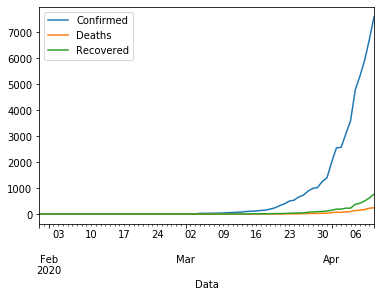

In [8]:
ind_data.plot()

Видим странное место в конце мая - начале апреля

Посмотрим поближе

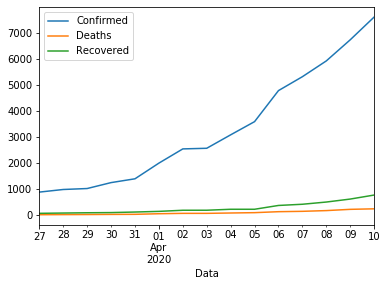

In [9]:
ind_data.loc[(ind_data.index.get_level_values('Data') > pd.to_datetime('2020-03-26')), ['Confirmed','Deaths','Recovered']].plot()

Как видно, 04-02 количесво новых заболевших практически не изменилось

Построим графики для разности величин

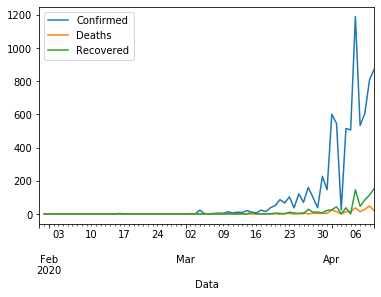

In [10]:
ind_data.diff(1).plot()

Снова видим несколько сильный скачков, первый сильный скачок вниз 04-02, когда был день с практически нулевый кол-вом зараженных. Также наблюдается очередной скачок графика вниз в самом конце, не помешает доп. информация. В общем разницы часто скачут, можно предположить, что в Индии что-то происходит с процессом взятия анализов. 

Теперь построим графики изменения среднего по выборке и среднего отклонения по выборке на группах для интервалов 3 дня, неделя, 2 недели, для показателя __количества зараженных__ 

In [11]:
# среднее по выборке
ind_mean_3d = ind_data.resample("3D").mean()
ind_mean_7d = ind_data.resample("7D").mean()
ind_mean_14d = ind_data.resample("14D").mean()

# среднее отклонение
ind_std_3d = ind_data.resample("3D").std()
ind_std_7d = ind_data.resample("7D").std()
ind_std_14d = ind_data.resample("14D").std()

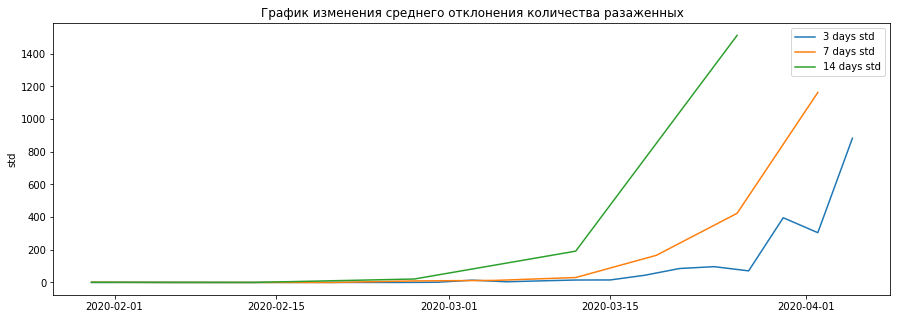

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(ind_std_3d['Confirmed'], label='3 days std')
plt.plot(ind_std_7d['Confirmed'], label='7 days std')
plt.plot(ind_std_14d['Confirmed'], label='14 days std')
plt.title('График изменения среднего отклонения количества разаженных')
plt.ylabel('std')
plt.legend()
plt.show()

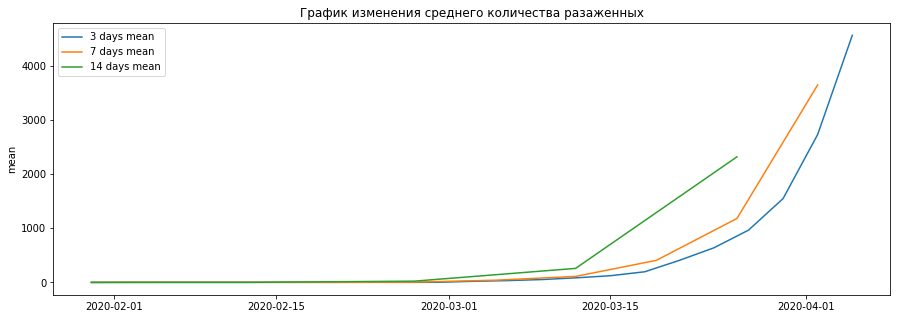

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(ind_mean_3d['Confirmed'], label='3 days mean')
plt.plot(ind_mean_7d['Confirmed'], label='7 days mean')
plt.plot(ind_mean_14d['Confirmed'], label='14 days mean')
plt.title('График изменения среднего количества разаженных')
plt.ylabel('mean')
plt.legend()
plt.show()